In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Libraries for text preprocessing
import re
import nltk

#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer#nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer
import os
os.getcwd()

'C:\\Users\\reliance\\Desktop\\MARKETING PROJECT'

In [2]:
data= pd.read_csv("data.csv")
data.iloc[30,2]
data.head()

,description,text,date,keywords,summary,url
0,5G hype won't close the digital divide,Dhara Singh/CNET\n\nTwelve miles from the hust...,2019-08-14 05:00:00-07:00,"['speeds', 'close', 'digital', 'hype', 'servic...","""Especially in Chicago [internet access] must ...",https://www.cnet.com//news/5g-hype-isnt-going-...
1,Doctor Who will stream on HBO Max,BBC\n\nDoctor Who will be streaming exclusivel...,2019-08-01 12:25:00-07:00,"['series', 'max', 'stream', 'cw', 'coming', 'd...",BBCDoctor Who will be streaming exclusively on...,https://www.cnet.com//news/doctor-who-will-str...
2,Leaked dongle hints at end of the headphone ja...,Roland Quandt\n\nThe headphone jack on phones ...,2019-08-01 07:41:00-07:00,"['samsungs', 'jack', 'dongle', 'samsung', 'rol...",Roland QuandtThe headphone jack on phones had ...,https://www.cnet.com//news/leaked-dongle-hints...
3,Apple ASMR videos are a pleasure for your eyes...,Geoffrey Morrison/CNET\n\nIf autonomous sensor...,2019-08-07 13:27:00-07:00,"['apple', 'iphone', 'video', 'wood', 'videos',...",Geoffrey Morrison/CNETIf autonomous sensory me...,https://www.cnet.com//news/apple-asmr-videos-a...
4,Adobe Fresco shows oil and water(colors) do mix,Sarah Tew/CNET\n\nAdobe Fresco makes me wish I...,2019-08-12 06:00:04-07:00,"['wish', 'really', 'mobile', 'adobe', 'fresco'...",Adobe credits Apple's latest graphics processo...,https://www.cnet.com//news/adobe-fresco-shows-...


In [3]:
data['word_count'] = data['text'].apply(lambda x: len(str(x).split(" ")))
data[['text','word_count']].head()

,text,word_count
0,Dhara Singh/CNET\n\nTwelve miles from the hust...,2297
1,BBC\n\nDoctor Who will be streaming exclusivel...,170
2,Roland Quandt\n\nThe headphone jack on phones ...,192
3,Geoffrey Morrison/CNET\n\nIf autonomous sensor...,206
4,Sarah Tew/CNET\n\nAdobe Fresco makes me wish I...,595


In [4]:
##Descriptive statistics of word counts
data.word_count.describe()

count    1535.000000
mean      534.565472
std       498.855413
min         3.000000
25%       254.000000
50%       350.000000
75%       606.000000
max      3841.000000
Name: word_count, dtype: float64

In [5]:
#Identify common words
freq = pd.Series(' '.join(data['text']).split()).value_counts()[:5]
freq

the    40376
to     21728
a      20250
and    19683
of     17099
dtype: int64

In [6]:
#Identify uncommon words
freq1 =  pd.Series(' '.join(data
         ['text']).split()).value_counts()[-10:]
freq1

Fairy/Poison     1
implications.    1
Vans             1
booked,          1
day)."           1
Grit             1
BDE,             1
eternity,        1
zipper,          1
"quickly         1
dtype: int64

In [7]:
##Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))
##Creating a list of custom stopwords
new_words = ["using", "show", "result", "large", "also", "iv", "one", "two", "new", "previously", "shown"]
stop_words = stop_words.union(new_words)

In [8]:
corpus = []
for i in range(0, len(data['text'])):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', data['text'][i])
    #Convert to lowercase
    text = text.lower()
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    ##Convert to list from string
    text = text.split()
    ##Stemming
    ps=PorterStemmer()    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus.append(text)

In [9]:
corpus[0]

'dhara singh cnet twelve mile hustle bustle time square lie brooklyn neighborhood brownsville part york tourist ever see gone flashing light high tech billboard crossroad world instead story sleek building stand stark contrast bare industrial street surrounding district building york councilwoman alicka amprey samuel say experiencing issue altice optimum internet service past four year rain say service stop complaint internet service provider changed status quo city country conversation next best thing conversation always get something even half way decent said people even grocery store people amprey samuel suffering connection woe across greater brownsville ocean hill community represents brownsville alone resident say rely public wi fi free cheaper use connectivity option according recent report brooklyn public library even broadband like ampry samuel service often spotty hype g next generation mobile technology promise high speed time faster current g tech mask reality million ameri

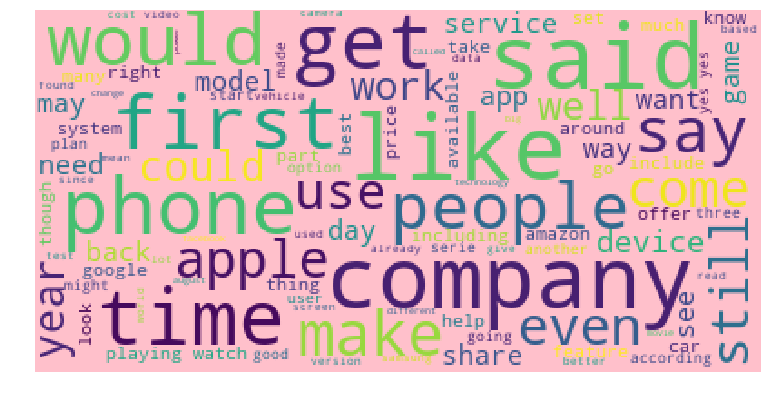

In [16]:
#Word cloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
#% matplotlib inline
wordcloud = WordCloud(background_color='pink',stopwords=stop_words,max_words=100,max_font_size=50, random_state=42).generate(str(corpus))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
#fig.savefig("word1.png", dpi=900)

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
import re
cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(corpus)

In [18]:
list(cv.vocabulary_.keys())[:10]

['singh',
 'cnet',
 'mile',
 'time',
 'square',
 'lie',
 'brooklyn',
 'neighborhood',
 'part',
 'york']

In [19]:
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]

In [20]:
#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]

[Text(0, 0, 'said'),
 Text(0, 0, 'like'),
 Text(0, 0, 'year'),
 Text(0, 0, 'company'),
 Text(0, 0, 'cnet'),
 Text(0, 0, 'time'),
 Text(0, 0, 'get'),
 Text(0, 0, 'apple'),
 Text(0, 0, 'phone'),
 Text(0, 0, 'first'),
 Text(0, 0, 'make'),
 Text(0, 0, 'watch'),
 Text(0, 0, 'google'),
 Text(0, 0, 'people'),
 Text(0, 0, 'may'),
 Text(0, 0, 'share'),
 Text(0, 0, 'service'),
 Text(0, 0, 'would'),
 Text(0, 0, 'say'),
 Text(0, 0, 'note')]

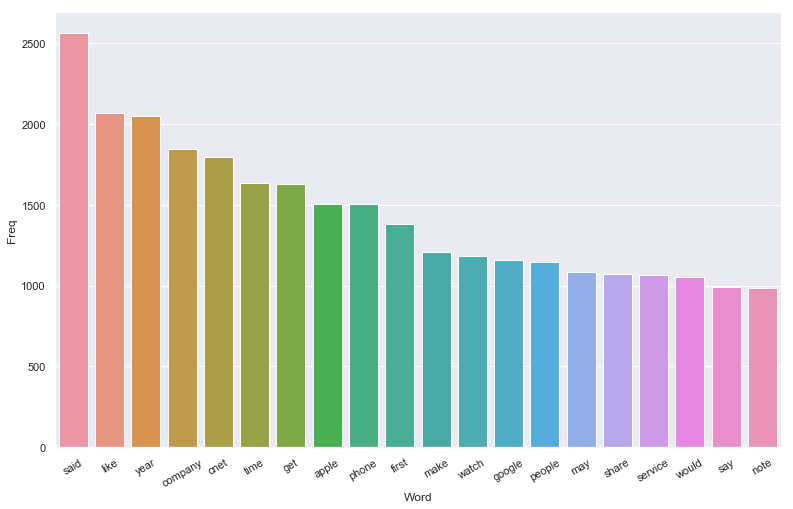

In [21]:
#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

In [22]:
from sklearn.feature_extraction.text import TfidfTransformer
 
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)# get feature names
feature_names=cv.get_feature_names()
 
# fetch document for which keywords needs to be extracted
doc=corpus[2]
 
#generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

In [23]:
tf_idf_vector.shape

(1, 10000)

In [24]:
#Function for sorting tf_idf in descending order
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results


In [25]:
sorted_items=sort_coo(tf_idf_vector.tocoo())
#sort the tf-idf vectors by descending order of scoressorted_items=sort_coo(tf_idf_vector.tocoo())#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,25)
 
# now print the results
print("\nAbstract:")
print(doc)
print("\nKeywords:")
for k in keywords:
    print(k,keywords[k])


Abstract:
roland quandt headphone jack phone good run like good thing eventually must end end seems finally arrived samsung upcoming galaxy note line last holdout trend ditching headphone jack appears samsung going note line leaked image shared thursday roland quandt sammobile seems pretty clear samsung planning mm headphone jack usb c dongle note plus dongle look like well headphone adapter different apple make iphones google make pixel signal end era showing samsung may indeed planning move without port going forward unclear samsung include dongle box like google charge separately like apple answer well samsung heavily rumored leaked next flagship likely need wait samsung unpacked event aug samsung immediately respond request comment

Keywords:
samsung 0.451
dongle 0.296
headphone 0.276
headphone jack 0.233
note line 0.204
jack 0.201
leaked 0.156
planning 0.141
note 0.133
end 0.122
seems 0.114
like 0.111
holdout 0.107
samsung may 0.102
mm headphone jack 0.1
mm headphone 0.1
going fo

In [26]:
data.iloc[2,4]

"Roland QuandtThe headphone jack on phones had a good run, but like all good things, it eventually must end.\nThat end seems to have finally arrived with Samsung's upcoming Galaxy Note 10 line.\nAfter being one of the last holdouts against the trend of ditching the headphone jack, it appears that Samsung is going to do just that for the Note 10 line.\nIn leaked images shared Thursday by Roland Quandt and SamMobile, it seems pretty clear Samsung is planning a 3.5mm headphone jack to USB-C dongle for its new Note 10 and 10 Plus.\nThe dongle itself looks like, well, a headphone adapter no different than what Apple makes for its iPhones or Google makes for its Pixels."

In [27]:
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(corpus)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='\\w{1,}', tokenizer=None,
        vocabulary=None)

In [28]:
xtrain_count =  count_vect.transform(corpus)


In [29]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble

import pandas, xgboost, numpy, string


In [30]:
lda_model = decomposition.LatentDirichletAllocation(n_components=20, learning_method='online', max_iter=20)
X_topics = lda_model.fit_transform(xtrain_count)
topic_word = lda_model.components_ 
vocab = count_vect.get_feature_names()
topic_word.shape

(20, 28517)

In [31]:
n_top_words = 20
topic_summaries = []
for i, topic_dist in enumerate(topic_word):
    topic_words = numpy.array(vocab)[numpy.argsort(topic_dist)][:-(n_top_words+1):-1]
    topic_summaries.append(' '.join(topic_words))

In [32]:
topic_words

array(['redskin', 'gruden', 'share', 'haskins', 'quarterback', 'annabel',
       'loverro', 'guice', 'keenum', 'maruti', 'kanika', 'mccoy',
       'kapoor', 'cornerback', 'suzuki', 'precious', 'bostic', 'peyton',
       'woodrum', 'acl'], dtype='<U41')

# Fuzzy seq similarity using Levenstein

In [33]:
from fuzzywuzzy import fuzz
fuzz.ratio(topic_summaries[3],corpus[979])

c:\users\reliance\appdata\local\programs\python\python37\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


0

In [34]:
fuzz.ratio("computer lab", "computeYRY")

64

In [ ]:
label_topics=np.zeros((len(corpus),20))
for i in range(len(corpus)):
    for j in range(20):
        label_topics[i,j]=fuzz.ratio(corpus[i],topic_summaries[j])

In [30]:
label_topics

array([[ 2.,  1.,  2., ...,  2.,  2.,  2.],
       [13., 12., 12., ..., 12., 13., 12.],
       [ 9., 13.,  8., ..., 12., 12., 10.],
       ...,
       [11., 10.,  5., ...,  7.,  8.,  8.],
       [ 6.,  4.,  7., ...,  5.,  5.,  7.],
       [16., 18., 13., ..., 14., 19., 16.]])

In [ ]:
# String matching using Levenstein
selected_topic=[]
for i in range(len(corpus)):
    selected_topic.append(list(label_topics[i]).index(max(label_topics[i])))

In [ ]:
selected_topic.head()

In [32]:
corpus[2]

'roland quandt headphone jack phone good run like good thing eventually must end end seems finally arrived samsung upcoming galaxy note line last holdout trend ditching headphone jack appears samsung going note line leaked image shared thursday roland quandt sammobile seems pretty clear samsung planning mm headphone jack usb c dongle note plus dongle look like well headphone adapter different apple make iphones google make pixel signal end era showing samsung may indeed planning move without port going forward unclear samsung include dongle box like google charge separately like apple answer well samsung heavily rumored leaked next flagship likely need wait samsung unpacked event aug samsung immediately respond request comment'

In [33]:
corpus[3]

'geoffrey morrison cnet autonomous sensory meridian response asmr thing apple added four video shot iphone youtube series wednesday tech giant uploaded video titled tapping scraping crunching whispering ghost forest minute long apple preface video note best enjoyed headphone tapping gentle rain sound accompanied visuals campsite scraping man working wood shop satisfying watch perfect wood shaving curl like visual asmr crunching sound footstep hiking along forest scenery finally whispering tell legend oregon neskowin ghost forest hushed tone video shot iphone x x max playing watch asmr video get made shot iphone series exhibit apple phone video capability user iphone xr x plus posted video channel well study describes asmr sensory phenomenon individual experience tingling static like sensation across scalp back neck time area response specific triggering audio visual stimulus'

In [34]:
corpus[4]

'sarah tew cnet adobe fresco make wish talent company ipad pro app painting sketching make wish apple pencil softer nib hey dream time lot painting apps littering app store brush better developed feature procreate seven set option every brush including ability adjust pencil behavior brush brush basis artrage custom paper type metallic paper ink feature complete beta fresco keeping night even come close fact missing lot crucial capability brush type charcoal airbrush palette knife smudging color jitter control ability save custom brush palette roadmap come blending stroke oil watercolor seen anything mobile come close fresco realism adobe credit apple latest graphic processor metal graphic api delivering speed necessary real time mixing watercolor see run screenshot lori grunin cnet adobe call live brush really brush behave way expect accurate retronym type act static brush really engineering distinction live brush live live painting pal pixel brush list includes sketching ink rake mark

In [35]:
data=pd.DataFrame({"text":corpus, "topic":selected_topic})
data.head()

,text,topic
0,dhara singh cnet twelve mile hustle bustle tim...,0
1,bbc doctor streaming exclusively hbo max next ...,8
2,roland quandt headphone jack phone good run li...,8
3,geoffrey morrison cnet autonomous sensory meri...,1
4,sarah tew cnet adobe fresco make wish talent c...,5
5,video screenshot amanda kooser cnet starship p...,13
6,sarah tew cnet macbook pro banned flight u avi...,7
7,enlarge image lexus lexus lc series car little...,2
8,james martin cnet president donald trump tweet...,17
9,getty image credit karma user able see people ...,5


# Multinomial NB

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['topic'],test_size=0.4)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_counts, y_train)

In [37]:
X_test_list=list(X_test)
X_test_list[0]

'took golf ball sized hail total prius brutal enough hard time wrapping head around hail long roll toilet paper national weather service office boulder colorado goodland kansa near colorado border looking report near record size hail storm week colorado kktv meteorologist brian bledsoe tuesday posted photo massive hailstone collected near bethune colorado said working verifying size hail could end beating state record inch centimeter ice chunk nwsboulder nwsgoodland verifying look record setting hailstone cowx told fell near bethune afternoon would easily beat record given way radar looked surprised stay tuned pic twitter com liuaziln r brian bledsoe brianbledsoe august still trying verify largest hailstone fell near otis washington county picture diameter state record see http co ukuzsmhf cowx cohail nw boulder nwsboulder august current colorado state hail size record set met many time recently adam county hail fell near small town otis northeastern colorado sunday weather service off

In [38]:
pred=[]
for i in range(len(X_test_list)):
    pred.append(int(str(clf.predict(count_vect.transform([X_test_list[i]])))[1:-1]))

In [39]:
predictions=pd.DataFrame({'MultinomialNB predictions':pred})

In [41]:
from sklearn import metrics
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.24      0.53      0.33       127
           1       0.02      0.02      0.02        42
           2       0.10      0.02      0.04        46
           3       0.00      0.00      0.00        30
           4       0.11      0.05      0.07        58
           5       0.19      0.07      0.10        43
           6       0.00      0.00      0.00         1
           7       0.86      0.17      0.28        36
           8       0.20      0.45      0.28        98
           9       0.00      0.00      0.00        18
          10       0.00      0.00      0.00        25
          11       0.00      0.00      0.00        12
          12       0.00      0.00      0.00        15
          13       0.08      0.04      0.05        27
          14       0.00      0.00      0.00         3
          15       0.00      0.00      0.00        14
          16       0.00      0.00      0.00         2
          17       0.00    

c:\users\reliance\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [42]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, nb_pred)
import seaborn as sns
sns.heatmap(cm, annot=True)

NameError: name 'nb_pred' is not defined

In [ ]:
metrics.f1_score(y_test, pred, average='weighted')

# Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_train_counts, y_train)

In [ ]:
classifier.predict(count_vect.transform([X_test_list[200]]))

In [36]:
rf_predictions=[] 
# model accuracy for X_test   
#accuracy = svm_model_linear.score(count_vect.transform([X_test_list[i]]), y_test) 
for i in range(len(X_test_list)): 
    rf_predictions.append(int(str(classifier.predict(count_vect.transform([X_test_list[i]])))[1:-1]))
# creating a confusion matrix 


NameError: name 'X_test_list' is not defined

In [ ]:
predictions['RF predictions']=rf_predictions

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, rf_predictions)
import seaborn as sns
sns.heatmap(cm, annot=True)

In [ ]:

from sklearn import metrics
print(metrics.classification_report(y_test, rf_predictions))

In [ ]:
metrics.f1_score(y_test, rf_predictions, average='weighted')

# kNN

In [ ]:
error = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_tfidf, y_train)
    pred_i = knn.predict(count_vect.transform(X_test_list))
    error.append(np.mean(pred_i != y_test))

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=18)

# Train the model using the training sets
model.fit(X_train_tfidf, y_train)

In [ ]:
knn_predictions=[] 
# model accuracy for X_test   
#accuracy = svm_model_linear.score(count_vect.transform([X_test_list[i]]), y_test) 
for i in range(len(X_test_list)): 
    knn_predictions.append(int(str(model.predict(count_vect.transform([X_test_list[i]])))[1:-1]))
# creating a confusion matrix 
knn_predictions

In [ ]:
predictions['kNN predictions']=knn_predictions

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, knn_predictions)
import seaborn as sns
sns.heatmap(cm, annot=True)

In [ ]:
metrics.f1_score(y_test, knn_predictions, average='weighted')

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test, knn_predictions))

In [ ]:
def small_links(link_list,term):
    a=[]
    for i in range(len(link_list)):
        if i not in a
        a.append(link_list[i])
        
        